In [1]:
# Install required libraries (run only once)
!pip install qiskit
!pip install qiskit-aer


# ---------------------------------------------------------
# Deutsch Algorithm using Qiskit 2.x
# Compatible with Qiskit 2.0+ (2024–2025)
# ---------------------------------------------------------

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator


# Choose the function type:
# Options → 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'


# ---------------------------------------------------------
# 1️⃣ Define the Oracle (Uf)
# ---------------------------------------------------------
def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for the given function type."""
    if function_type == 'constant_0':
        # f(x) = 0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x) = 1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x) = x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x) = NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
    else:
        raise ValueError("Invalid function_type. Choose from 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'.")


# ---------------------------------------------------------
# 2️⃣ Build the Quantum Circuit
# ---------------------------------------------------------
qc = QuantumCircuit(2, 1)   # 2 qubits, 1 classical bit

# Step 1: Initialize qubits
qc.x(1)             # Set output qubit |y⟩ = |1⟩
qc.barrier()

# Step 2: Apply Hadamard to both qubits
qc.h([0, 1])
qc.barrier()

# Step 3: Apply Oracle
deutsch_oracle(qc, function_type)
qc.barrier()

# Step 4: Apply Hadamard to input qubit
qc.h(0)
qc.barrier()

# Step 5: Measure the input qubit
qc.measure(0, 0)

# ---------------------------------------------------------
# 3️⃣ Visualize Circuit
# ---------------------------------------------------------
print(qc.draw(output="text"))


# ---------------------------------------------------------
# 4️⃣ Simulate the Circuit
# ---------------------------------------------------------
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# ---------------------------------------------------------
# 5️⃣ Interpret Results
# ---------------------------------------------------------
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.6 MB/s eta 0:00:00
           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├─░─┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘ ░ └╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────░──╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ░  ║ 
c: 1/═══════════════════════════════════════════╩═
                                                0 

Measurement results: {'1': 1024}
→ Function is BALANCED.


In [4]:
# ---------------------------------------------------------
# TASK 1: Custom Oracle - f(x) = x XOR 1
# ---------------------------------------------------------

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for different function types."""
    if function_type == 'constant_0':
        pass
    elif function_type == 'constant_1':
        qc.x(1)
    elif function_type == 'balanced_0':
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
    elif function_type == 'custom_xor_1':
        # f(x) = x XOR 1 (balanced)
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
    else:
        raise ValueError("Invalid function type.")

# Create circuit
qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0, 1])
deutsch_oracle(qc, 'custom_xor_1')
qc.h(0)
qc.measure(0, 0)

print(qc.draw(output="text"))

# Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement Results:", counts)
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT")
else:
    print("→ Function is BALANCED")

     ┌───┐┌───┐     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├
     ├───┤├───┤┌─┴─┐└───┘└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├───────────╫─
     └───┘└───┘└───┘           ║ 
c: 1/══════════════════════════╩═
                               0 

Measurement Results: {'1': 1024}
→ Function is BALANCED


Text(0.5, 1.0, 'State After Oracle')

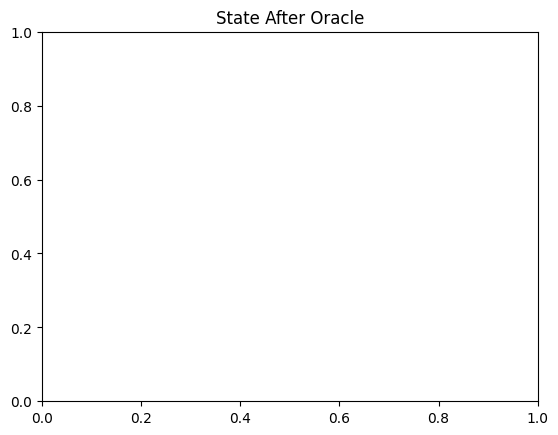

In [5]:
# ---------------------------------------------------------
# TASK 2: Bloch Sphere Visualization
# ---------------------------------------------------------

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# After Hadamard
qc1 = QuantumCircuit(2)
qc1.x(1)
qc1.h([0, 1])
state1 = Statevector.from_instruction(qc1)
plot_bloch_multivector(state1)
plt.title("State After Hadamard")

# After Oracle (Balanced)
qc2 = qc1.copy()
qc2.cx(0, 1)
state2 = Statevector.from_instruction(qc2)
plot_bloch_multivector(state2)
plt.title("State After Oracle")

In [6]:
# ---------------------------------------------------------
# TASK 3: Deutsch–Jozsa Extension (2-input function)
# ---------------------------------------------------------

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# 2 input qubits + 1 output qubit
qc = QuantumCircuit(3, 2)
qc.x(2)
qc.h([0, 1, 2])

# Example balanced oracle: f(x1, x2) = x1 XOR x2
qc.cx(0, 2)
qc.cx(1, 2)

# Apply Hadamard to input qubits
qc.h([0, 1])
qc.measure([0, 1], [0, 1])

print(qc.draw(output="text"))

# Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
counts = sim.run(qc_compiled).result().get_counts()
print("Results:", counts)

if list(counts.keys())[0] == '00':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")

     ┌───┐          ┌───┐     ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─────┤M├───
     ├───┤       │  └───┘┌───┐└╥┘┌─┐
q_1: ┤ H ├───────┼────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫──╫─
     └───┘└───┘└───┘└───┘      ║  ║ 
c: 2/══════════════════════════╩══╩═
                               0  1 
Results: {'11': 1024}
→ Function is BALANCED.


In [8]:
# ---------------------------------------------------------
# TASK 4: Noise Impact on Deutsch Algorithm (Fixed)
# ---------------------------------------------------------

from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Build simple Deutsch circuit again
qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0, 1])
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)

# -------------------------------
# Ideal simulation (no noise)
# -------------------------------
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
ideal_counts = sim.run(qc_compiled).result().get_counts()
print("Ideal Results:", ideal_counts)

# -------------------------------
# Create a noise model
# -------------------------------
noise_model = NoiseModel()

# Define 1-qubit and 2-qubit depolarizing errors
error_1q = depolarizing_error(0.05, 1)   # 5% 1-qubit error
error_2q = depolarizing_error(0.1, 2)    # 10% 2-qubit error

# Apply correctly: 1-qubit errors to 'x' and 'h'; 2-qubit error to 'cx'
noise_model.add_all_qubit_quantum_error(error_1q, ['x', 'h'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

# -------------------------------
# Noisy simulation
# -------------------------------
noisy_sim = AerSimulator(noise_model=noise_model)
result_noisy = noisy_sim.run(qc_compiled).result()
noisy_counts = result_noisy.get_counts()

print("Noisy Results:", noisy_counts)

Ideal Results: {'1': 1024}
Noisy Results: {'0': 116, '1': 908}


In [9]:
# ---------------------------------------------------------
# TASK 5: Classical vs Quantum Queries
# ---------------------------------------------------------

def classical_check(f):
    """Classically determine if f is constant or balanced."""
    if f(0) == f(1):
        return "Constant"
    else:
        return "Balanced"

# Define functions
f_const = lambda x: 0          # Constant
f_bal = lambda x: x ^ 1        # Balanced

# Classical evaluation
print("f_const →", classical_check(f_const))
print("f_bal   →", classical_check(f_bal))

print("\nClassical algorithm requires 2 evaluations: f(0) and f(1).")
print("Quantum Deutsch algorithm requires only 1 oracle call.")

f_const → Constant
f_bal   → Balanced

Classical algorithm requires 2 evaluations: f(0) and f(1).
Quantum Deutsch algorithm requires only 1 oracle call.
